# Import

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [2]:
df = pd.read_csv('processed_data_II33.csv')

In [6]:
select_df = df.drop(columns=['Unnamed: 0', 'RIAGENDR', 'SLQ040', 'SLQ050', 'PAQ605', 'PAQ620', 'SMQ040', 'ALQ130', 'DIQ010',
                                'physical_activity', 'diabetes'])

# Train - Validation - Test Split

In [16]:
# All feature data
features = df.iloc[:,:-1]
# All label data
labels = df.iloc[:,-1:].values.ravel()

# Using the remaining training records, split into training, validation and test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15)

In [18]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': [0.01, 0.1, 1, 10]}

# Create the SVM model
svm_model = SVC()

# Perform Grid Search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [33]:
y_pred = svm_model.predict(X_test1_scaled)

accuracy = accuracy_score(y_test1, y_pred)
conf_matrix = confusion_matrix(y_test1, y_pred)
classification_rep = classification_report(y_test1, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7485380116959064
Confusion Matrix:
[[  6  42]
 [  1 122]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.12      0.22        48
         1.0       0.74      0.99      0.85       123

    accuracy                           0.75       171
   macro avg       0.80      0.56      0.53       171
weighted avg       0.78      0.75      0.67       171



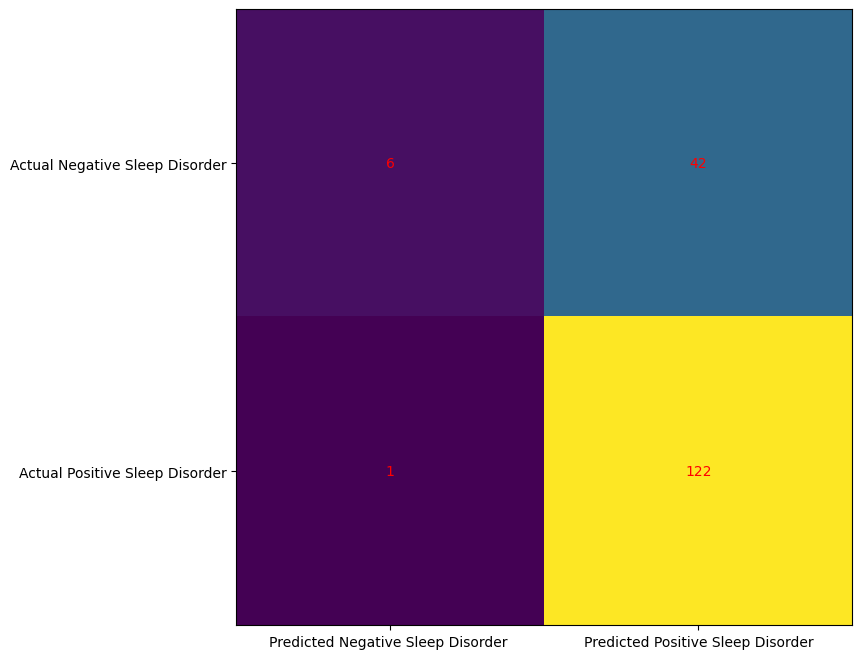

In [38]:
cm = confusion_matrix(y_test1, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Negative Sleep Disorder ', 'Predicted Positive Sleep Disorder'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Negative Sleep Disorder', 'Actual Positive Sleep Disorder'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Decision Surface

In [37]:
'''
X = X_train1_scaled
y = y_train1

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()
'''

"\nX = X_train1_scaled\ny = y_train1\n\ndef make_meshgrid(x, y, h=.02):\n    x_min, x_max = x.min() - 1, x.max() + 1\n    y_min, y_max = y.min() - 1, y.max() + 1\n    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))\n    return xx, yy\n\ndef plot_contours(ax, clf, xx, yy, **params):\n    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])\n    Z = Z.reshape(xx.shape)\n    out = ax.contourf(xx, yy, Z, **params)\n    return out\n\nfig, ax = plt.subplots()\n# title for the plots\ntitle = ('Decision surface of SVC')\n# Set-up grid for plotting.\nX0, X1 = X[:, 0], X[:, 1]\nxx, yy = make_meshgrid(X0, X1)\n\nplot_contours(ax, svm_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)\nax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')\nax.set_ylabel('y label here')\nax.set_xlabel('x label here')\nax.set_xticks(())\nax.set_yticks(())\nax.set_title(title)\nax.legend()\nplt.show()\n"